In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/movments.csv',index_col=0)

/var/folders/l8/4nc6fjwn5dvdr5yfvvf_wq1h0000gp/T/ipykernel_25520/1010189019.py:1: DtypeWarning: Columns (3,6,8,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/movments.csv',index_col=0)


In [3]:
df['ScooterModel'].unique()

array([nan, 'Circ B1'], dtype=object)

In [4]:
df.describe()

,X,Distance,index,lat,lon,power,last_lat,last_lon,distanceTravelled
count,3.050251e+06,417790.000000,417790.000000,3.050251e+06,3.050251e+06,3.050251e+06,3.044605e+06,3.044605e+06,3.050251e+06
mean,1.086480e+06,888.481263,24.077111,5.153597e+01,1.717697e+01,6.986141e+01,5.153567e+01,1.717739e+01,3.803951e+04
std,1.674164e+06,539.912795,14.492364,1.888989e+01,1.716726e+01,2.467882e+01,1.889017e+01,1.716765e+01,8.627152e+05
min,0.000000e+00,1.810000,0.000000,0.000000e+00,-3.762308e+00,0.000000e+00,0.000000e+00,-3.762308e+00,0.000000e+00
25%,1.524725e+05,455.950000,11.000000,5.990919e+01,1.073113e+01,5.000000e+01,5.990920e+01,1.073114e+01,0.000000e+00
50%,3.885000e+05,817.360000,24.000000,5.991490e+01,1.075082e+01,7.500000e+01,5.991490e+01,1.075082e+01,1.857029e+00
75%,7.474735e+05,1225.190000,37.000000,5.992606e+01,1.076945e+01,9.300000e+01,5.992606e+01,1.076945e+01,1.047039e+01
max,5.413703e+06,4574.540000,49.000000,6.111841e+01,8.538057e+01,1.000000e+02,6.111841e+01,8.538057e+01,1.998732e+07


## Data Preprocessing

In [5]:
def preprocessing(df):
    #df = df.dropna()
    df = df.drop_duplicates()
    df = df.sort_values('time', ascending=True).reset_index(drop=False)
    df = df.sort_values('time').set_index('time')
    df.index = pd.to_datetime(df.index).tz_localize('Europe/Helsinki')
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df=df[['id','lat', 'lon', 'operator', 'power', 'rangeLeft',
       'txt_code', 'last_lat', 'last_lon', 'distanceTravelled','day','hour','dayofweek','month']]
    return df
    
    

In [6]:
df_temp=preprocessing(df)

## Exploratory Data Analysis (EDA):

In [7]:
def distance_traveld_per_operator(df):
    return df.groupby('operator').count()['distanceTravelled']



In [8]:
distance_per_operator=distance_traveld_per_operator(df_temp)

In [9]:
import plotly.graph_objects as go
def plot_distance_tarveld_per_operator(distance_per_operator):
    fig=go.Figure()
    fig.add_trace(go.Bar(x=distance_per_operator.index,y=distance_per_operator.values))
    fig.update_layout(xaxis_title="Operator", yaxis_title="Distance Travelled", title="Distance Travelled per Operator")
    return fig.show()

In [10]:
plot_distance_tarveld_per_operator(distance_per_operator)

In [11]:
import plotly.express as px
def plot_distance_taveled_day_of_week(df):
    df=df_temp.groupby(['dayofweek','operator'])['distanceTravelled'].sum().reset_index()
    fig = px.bar(df, x='dayofweek', y='distanceTravelled', color='operator', barmode='group',
                title='Total Distance Travelled by Day of Week and Operator')
    return fig.show()

In [12]:
traveled_day_of_week=plot_distance_taveled_day_of_week(df_temp)

In [13]:
def plot_distance_distribution(df):
    fig = px.histogram(df, x='distanceTravelled', title='Distribution of Distance Travelled')
    return fig.show()
    

In [15]:
hu=pd.DataFrame(df_temp.groupby(['hour','operator'])['distanceTravelled'].mean())

In [26]:
import seaborn as sns
def plot_distance_mean(df,scale):
    try:
        if scale in ['hour','dayofweek']:
            hu=pd.DataFrame(df.groupby([scale,'operator'])['distanceTravelled'].mean())
        return sns.displot(hu, x="distanceTravelled", kind="kde")
    except:
        return "Invalid scale, enter 'hour' or 'dayofweek as scale."

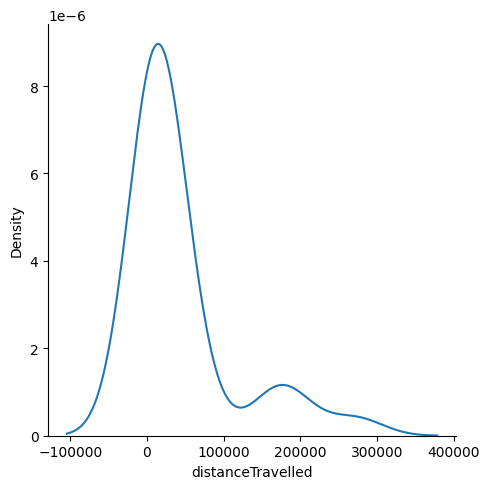

In [28]:
plot_distance_mean(df_temp,'dayofweek')

In [36]:
#df_temp.groupby(['power','operator'])['distanceTravelled'].mean()  

df=df_temp.groupby(['power','operator'])['distanceTravelled'].mean().reset_index()
fig = px.line(df, x='power', y='distanceTravelled', color='operator', 
            title='Total Distance Travelled by Day of Week and Operator')
fig.show()

                      power  distanceTravelled  dayofweek       lat       lon
power              1.000000          -0.033910   0.178984 -0.126714  0.134762
distanceTravelled -0.033910           1.000000  -0.156724  0.014012 -0.040226
dayofweek          0.178984          -0.156724   1.000000 -0.389458  0.400866
lat               -0.126714           0.014012  -0.389458  1.000000 -0.961197
lon                0.134762          -0.040226   0.400866 -0.961197  1.000000


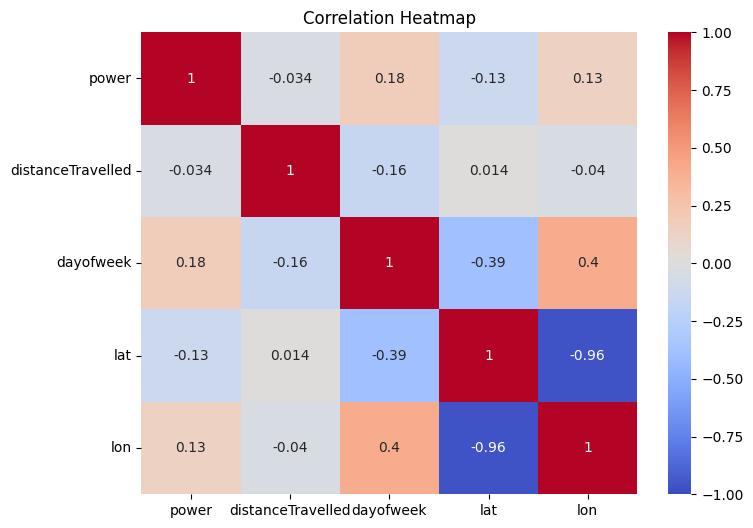

In [41]:
import matplotlib.pyplot as plt
df=df_temp.groupby(['power','operator'])[['distanceTravelled','dayofweek','lat','lon']].mean().reset_index()
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()